## Wine drinkers

#### Part 1- Segmenting wine drinkers
Here I explore online sales data for a wine store based in the Upper East Side in NYC. Although online sales are not representative of total sales for this particular store (most of their sales are in-store), it will be informative to take a look at what online customers are buying.

In Part 2 I'll use this data to build wine recommenders.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics
from ggplot import *
import matplotlib.pyplot as plt
import seaborn as sns

/Users/jkim/anaconda/envs/py35/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
data = pd.read_csv('wine_data.csv')

#### We have data for purchases by wine type. Each row is a customer.

In [3]:
data.head()

,Cabernet Sauvignon,Pinot Noir,Zinfandel,Syrah,Cabernet Franc,Malbec,Barbera,Sangiovese,Montepulciano,Merlot,...,Espumante,Champagne,Port,Chardonnay,Sauvignon Blanc,Pinot Grigio,Riesling,Gewurztraminer,Semillon,Muscat
0,2,1,1,0,1,0,1,0,0,0,...,0,0,0,2,1,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,0,0,0
3,0,1,3,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0
4,0,2,1,0,0,0,0,0,0,0,...,0,0,0,2,2,2,2,1,0,1


In [4]:
data.describe()

,Cabernet Sauvignon,Pinot Noir,Zinfandel,Syrah,Cabernet Franc,Malbec,Barbera,Sangiovese,Montepulciano,Merlot,...,Espumante,Champagne,Port,Chardonnay,Sauvignon Blanc,Pinot Grigio,Riesling,Gewurztraminer,Semillon,Muscat
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,...,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
mean,0.791667,1.506944,1.406250,0.611111,0.885417,0.180556,0.402778,0.364583,0.402778,0.968750,...,0.069444,0.069444,0.083333,1.385417,0.961806,0.402778,0.388889,0.388889,0.322917,0.336806
std,1.167952,1.361474,1.355681,1.040042,0.920572,0.474474,0.628248,0.609789,0.660687,1.047178,...,0.267985,0.366788,0.344190,1.343741,1.216295,0.665940,0.636969,0.625933,0.544112,0.579348
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,3.000000,3.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,6.000000,5.000000,5.000000,4.000000,4.000000,2.000000,3.000000,3.000000,4.000000,6.000000,...,2.000000,4.000000,3.000000,5.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000


### The most popular wines

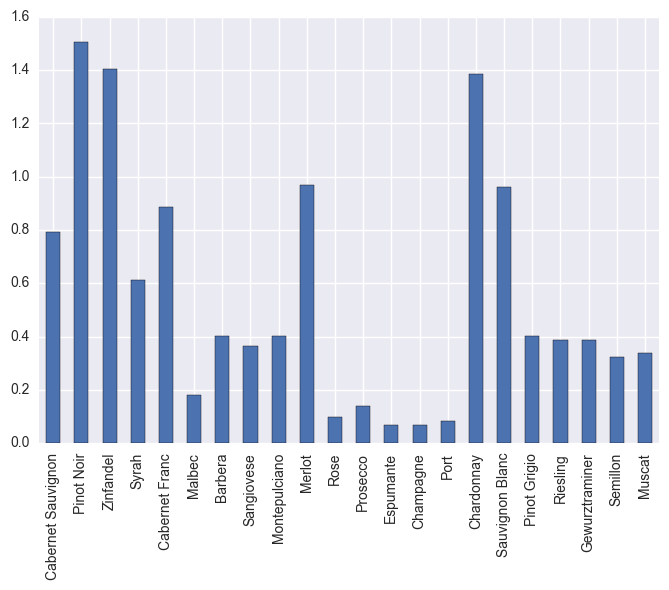

In [5]:
data.mean().plot(kind='bar')

The most popular wines are Pinot Noir, Zinfandel, Merlot, Chardonnay, and Sauvignon Blanc.

### Clustering.

In [6]:
X = data[data.columns]

# All column names (wine types) are stored as x_cols
x_cols = data.columns

I'll use the elbow method to find the optimal number of clusters. This identifies the value of k (number of clusters) where the distortion (the within-cluster sum of squared errors or SSE) begins to increase the most rapidly.

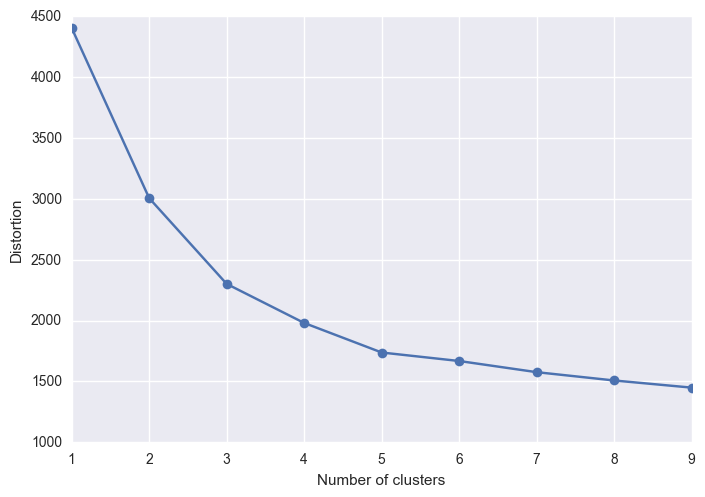

In [7]:
distortions = []
for i in range (1,10):
    km = KMeans(n_clusters=i,
               init='k-means++',
               n_init=10,
               max_iter=300,
               random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
    
plt.plot(range(1,10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

It looks like the elbow is located at k=3... We can also use the silhouette score; this is a measure of how similar an objects is to its own cluster compared to other clusters. The score is higher when clusters are dense and well separated. A score of 1 is the highest and a score of -1 is the lowest. Scores around zero indicate overlapping clusters.

In [8]:
silhouette = {}
for i in range (2,10):
    km = KMeans(n_clusters=i,
               init='k-means++',
               n_init=10,
               max_iter=300,
               tol=1e-04,
               random_state=0)
    km.fit(X)
    silhouette[i] = metrics.silhouette_score(X, km.labels_, metric='euclidean')

silhouette

{2: 0.31931332744051177,
 3: 0.36448555932200755,
 4: 0.31707194676835887,
 5: 0.32698272012743929,
 6: 0.31207073251298323,
 7: 0.26206479403635502,
 8: 0.26891906112067659,
 9: 0.24363780237120475}

k=3 gives the highest score, by a hair. In general these scores are not that high indicating that there will be a fair amount of overlap between clusters. 

In [9]:
cluster3 = KMeans(n_clusters=3,
               init='k-means++',
               n_init=10,
               max_iter=300,
               tol=1e-04,
               random_state=0)

In [10]:
# Add a column that indicates which cluster each point falls into
data['cluster3'] = cluster3.fit_predict(X)

# Let's see how many are in each cluster
data.cluster3.value_counts()

0    155
1     77
2     56
Name: cluster3, dtype: int64

#### To visualize the data I will project the data to 2D.

In [11]:
pca = PCA(n_components=2)

data['x']=pca.fit_transform(data[x_cols])[:,0]
data['y']=pca.fit_transform(data[x_cols])[:,1]

clusters_2d = data[['cluster3', 'x', 'y']]

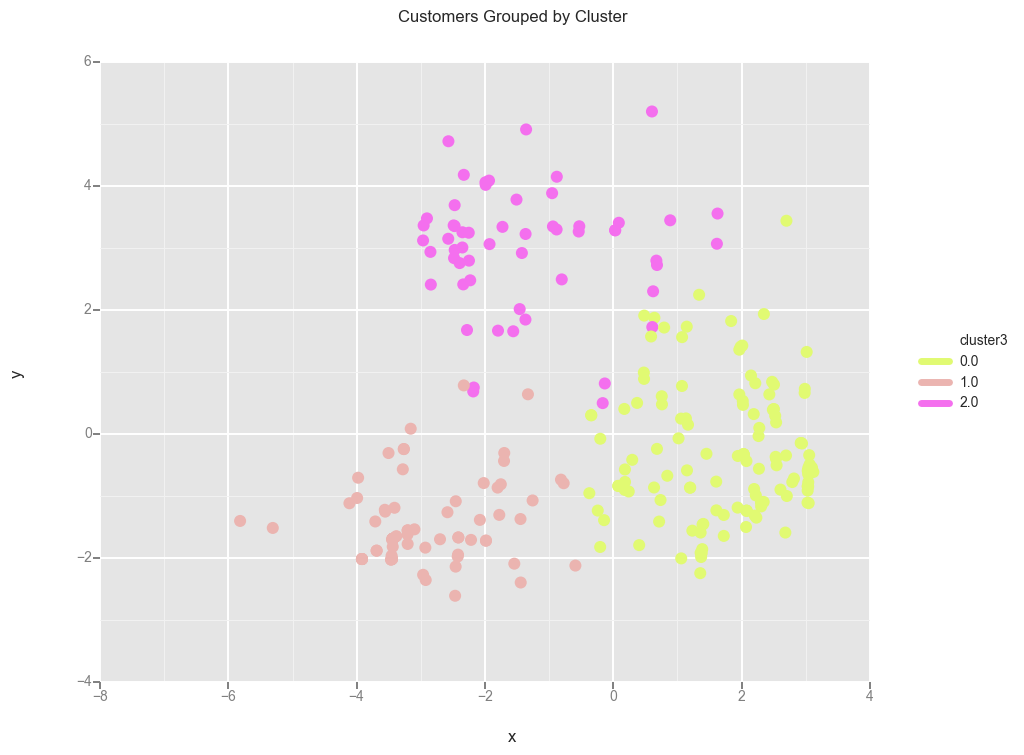

<ggplot: (-9223372036568001939)>

In [12]:
ggplot(clusters_2d, aes(x='x', y='y', color='cluster3')) + \
    scale_color_gradient(low='#E1FA72', high='#F46FEE') + \
    geom_point(size=75) + ggtitle("Customers Grouped by Cluster")

There is some overlap between the clusters. Let's look at the clusters more closely and see what people are buying for each cluster.

### Analyzing clusters

In [13]:
# Making columns that indicate whether a customer is in a particular cluster
data['is_0'] = data.cluster3==0.0
data['is_1'] = data.cluster3==1.0
data['is_2'] = data.cluster3==2.0

just_wine = data.drop(['cluster3','x','y'],1)

In [14]:
# Let's group by cluster
cluster0 = just_wine.groupby('is_0').sum()
cluster1 = just_wine.groupby('is_1').sum()
cluster2 = just_wine.groupby('is_2').sum()

In [15]:
# Getting just the relevant row for each cluster
zero = cluster0.iloc[1:2]
one = cluster1.iloc[1:2]
two = cluster2.iloc[1:2]

# Let's put all the groups into one dataframe
all_clusters = zero.append(one, ignore_index=True)
all_clusters = all_clusters.append(two, ignore_index=True)

all_clusters

,Barbera,Cabernet Franc,Cabernet Sauvignon,Champagne,Chardonnay,Espumante,Gewurztraminer,Malbec,Merlot,Montepulciano,...,Riesling,Rose,Sangiovese,Sauvignon Blanc,Semillon,Syrah,Zinfandel,is_0,is_1,is_2
0,55,81,77,17,71,7,68,35,88,57,...,67,12,45,68,54,29,52,NaN,0.0,0.0
1,11,140,11,1,205,9,27,10,159,11,...,28,5,11,206,28,10,212,0.0,NaN,0.0
2,50,34,140,2,123,4,17,7,32,48,...,17,11,49,3,11,137,141,0.0,0.0,NaN


In [16]:
'''For some reason appending alphabetizes columns. 
The previous ordering was more convenient because reds were with reds
and whites were with whites, so I'll go back to that column ordering.
'''
all_clusters = all_clusters.reindex_axis(cluster0.columns, axis=1)
all_clusters

,Cabernet Sauvignon,Pinot Noir,Zinfandel,Syrah,Cabernet Franc,Malbec,Barbera,Sangiovese,Montepulciano,Merlot,...,Port,Chardonnay,Sauvignon Blanc,Pinot Grigio,Riesling,Gewurztraminer,Semillon,Muscat,is_1,is_2
0,77,69,52,29,81,35,55,45,57,88,...,10,71,68,71,67,68,54,57,0.0,0.0
1,11,218,212,10,140,10,11,11,11,159,...,5,205,206,27,28,27,28,26,NaN,0.0
2,140,147,141,137,34,7,50,49,48,32,...,9,123,3,18,17,17,11,14,0.0,NaN


In [17]:
all_clusters.drop(['is_1','is_2'], axis=1, inplace=True)
all_clusters

,Cabernet Sauvignon,Pinot Noir,Zinfandel,Syrah,Cabernet Franc,Malbec,Barbera,Sangiovese,Montepulciano,Merlot,...,Espumante,Champagne,Port,Chardonnay,Sauvignon Blanc,Pinot Grigio,Riesling,Gewurztraminer,Semillon,Muscat
0,77,69,52,29,81,35,55,45,57,88,...,7,17,10,71,68,71,67,68,54,57
1,11,218,212,10,140,10,11,11,11,159,...,9,1,5,205,206,27,28,27,28,26
2,140,147,141,137,34,7,50,49,48,32,...,4,2,9,123,3,18,17,17,11,14


Now if you wanted to, you can see which wines are most/least popular for each cluster, and more easily look at differences between the clusters.

### Most/least popular wines by cluster

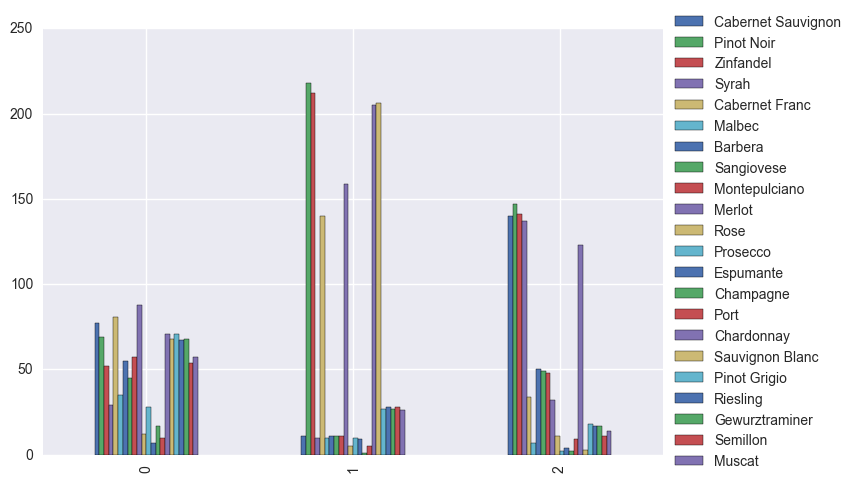

In [18]:
all_clusters.plot.bar().legend(loc='center left', bbox_to_anchor=(1, 0.5))

Just some observations: Most of the Pinot Noir, Zinfandel, Merlot, Chardonnay, and Sauvignon Blanc sales come from cluster 1. And most of the Syrah sales are coming from those in cluster 2.

I'm also interested in the mean purchases for each wine type, grouped by cluster.

In [19]:
cluster0_avg = just_wine.groupby('is_0').mean()
cluster1_avg = just_wine.groupby('is_1').mean()
cluster2_avg = just_wine.groupby('is_2').mean()

In [20]:
# Here's the result of one of the group bys
cluster0_avg

,Cabernet Sauvignon,Pinot Noir,Zinfandel,Syrah,Cabernet Franc,Malbec,Barbera,Sangiovese,Montepulciano,Merlot,...,Port,Chardonnay,Sauvignon Blanc,Pinot Grigio,Riesling,Gewurztraminer,Semillon,Muscat,is_1,is_2
is_0,,,,,,,,,,,,,,,,,,,,,
False,1.135338,2.744361,2.654135,1.105263,1.308271,0.127820,0.458647,0.451128,0.443609,1.436090,...,0.105263,2.466165,1.571429,0.338346,0.338346,0.330827,0.293233,0.300752,0.578947,0.421053
True,0.496774,0.445161,0.335484,0.187097,0.522581,0.225806,0.354839,0.290323,0.367742,0.567742,...,0.064516,0.458065,0.438710,0.458065,0.432258,0.438710,0.348387,0.367742,0.000000,0.000000


In [21]:
# Getting just the relevant row for each cluster
zero_avg = cluster0_avg.iloc[1:2]
one_avg = cluster1_avg.iloc[1:2]
two_avg = cluster2_avg.iloc[1:2]

# Let's put all the groups into one dataframe
all_clusters_avg = zero_avg.append(one_avg, ignore_index=True)
all_clusters_avg = all_clusters_avg.append(two_avg, ignore_index=True)

all_clusters_avg

,Barbera,Cabernet Franc,Cabernet Sauvignon,Champagne,Chardonnay,Espumante,Gewurztraminer,Malbec,Merlot,Montepulciano,...,Riesling,Rose,Sangiovese,Sauvignon Blanc,Semillon,Syrah,Zinfandel,is_0,is_1,is_2
0,0.354839,0.522581,0.496774,0.109677,0.458065,0.045161,0.438710,0.225806,0.567742,0.367742,...,0.432258,0.077419,0.290323,0.438710,0.348387,0.187097,0.335484,NaN,0.0,0.0
1,0.142857,1.818182,0.142857,0.012987,2.662338,0.116883,0.350649,0.129870,2.064935,0.142857,...,0.363636,0.064935,0.142857,2.675325,0.363636,0.129870,2.753247,0.0,NaN,0.0
2,0.892857,0.607143,2.500000,0.035714,2.196429,0.071429,0.303571,0.125000,0.571429,0.857143,...,0.303571,0.196429,0.875000,0.053571,0.196429,2.446429,2.517857,0.0,0.0,NaN


In [22]:
all_clusters_avg = all_clusters_avg.reindex_axis(zero_avg.columns, axis=1)

all_clusters_avg.drop(['is_1','is_2'], axis=1, inplace=True)
all_clusters_avg

,Cabernet Sauvignon,Pinot Noir,Zinfandel,Syrah,Cabernet Franc,Malbec,Barbera,Sangiovese,Montepulciano,Merlot,...,Espumante,Champagne,Port,Chardonnay,Sauvignon Blanc,Pinot Grigio,Riesling,Gewurztraminer,Semillon,Muscat
0,0.496774,0.445161,0.335484,0.187097,0.522581,0.225806,0.354839,0.290323,0.367742,0.567742,...,0.045161,0.109677,0.064516,0.458065,0.438710,0.458065,0.432258,0.438710,0.348387,0.367742
1,0.142857,2.831169,2.753247,0.129870,1.818182,0.129870,0.142857,0.142857,0.142857,2.064935,...,0.116883,0.012987,0.064935,2.662338,2.675325,0.350649,0.363636,0.350649,0.363636,0.337662
2,2.500000,2.625000,2.517857,2.446429,0.607143,0.125000,0.892857,0.875000,0.857143,0.571429,...,0.071429,0.035714,0.160714,2.196429,0.053571,0.321429,0.303571,0.303571,0.196429,0.250000


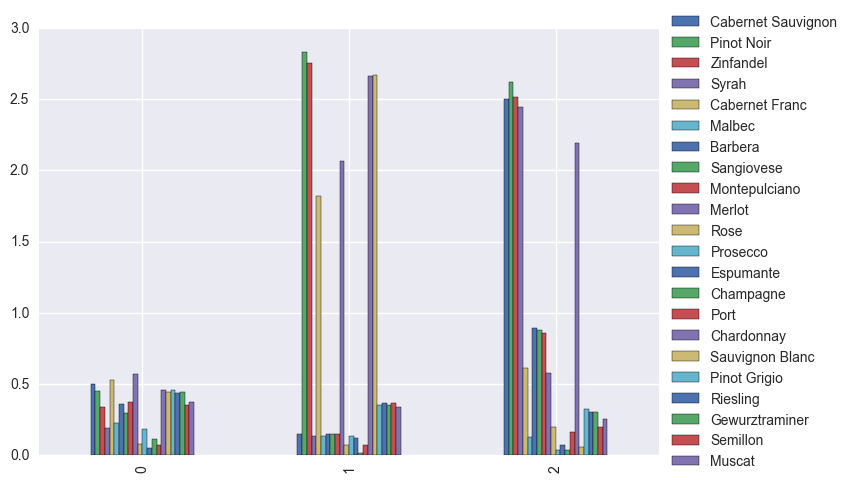

In [23]:
all_clusters_avg.plot.bar().legend(loc='center left', bbox_to_anchor=(1, 0.5))

Customers in cluster 0 buy less on average than the other two clusters, and don't seem to have strong preferences when it comes to reds vs whites. 

The customers in cluster 1 strongly prefer Pinot Noir, Zinfandel, Cabernet Franc, Merlot, Chardonnay, and Sauvignon Blanc over the other wines.

Customers in cluster 2 strongly prefer Cabernet Sauvignon, Pinot Noir, Zinfandel, Syrah, and Chardonnay, and buy more Italian wines on average. 

Unsurprisingly, dessert or sparkling or special occasion wines (such as Prosecco, Espumante, Champagne) are low for all clusters.